# Kobe shots #

### Load libraries ###

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cross_validation import train_test_split


%matplotlib inline

/Users/joaopcoelho/anaconda/envs/python2/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


### Useful functions ###

In [3]:
# rough sketch - does not deal with imperial units (i.e. feet_val must be already converted to decimal, e.g. 6'9 = 6.75)
def ft_to_m(feet_val):
    return feet_val*0.3048

In [15]:
#convert shot flags to colors
def flag_colors(flag):
    if flag == 1: return 'green'
    if flag == 0: return 'red'
    return 'black'

### Load and explore data ###

In [4]:
data = pd.read_csv('data.csv')

In [5]:
data.head()

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
0,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,...,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,1
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5


In [6]:
data.describe()

,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,seconds_remaining,shot_distance,shot_made_flag,team_id,shot_id
count,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,25697.000000,30697,30697.000000
mean,249.190800,24764065.868065,33.953192,7.110499,91.107535,-118.262690,4.885624,2.519432,0.146562,28.365085,13.437437,0.446161,1610612747,15349.000000
std,150.003712,7755174.890198,0.087791,110.124578,87.791361,0.110125,3.449897,1.153665,0.353674,17.478949,9.374189,0.497103,0,8861.604943
min,2.000000,20000012.000000,33.253300,-250.000000,-44.000000,-118.519800,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1610612747,1.000000
25%,110.000000,20500077.000000,33.884300,-68.000000,4.000000,-118.337800,2.000000,1.000000,0.000000,13.000000,5.000000,0.000000,1610612747,7675.000000
50%,253.000000,20900354.000000,33.970300,0.000000,74.000000,-118.269800,5.000000,3.000000,0.000000,28.000000,15.000000,0.000000,1610612747,15349.000000
75%,368.000000,29600474.000000,34.040300,95.000000,160.000000,-118.174800,8.000000,3.000000,0.000000,43.000000,21.000000,1.000000,1610612747,23023.000000
max,659.000000,49900088.000000,34.088300,248.000000,791.000000,-118.021800,11.000000,7.000000,1.000000,59.000000,79.000000,1.000000,1610612747,30697.000000


In [7]:
list(data.columns.values)

['action_type',
 'combined_shot_type',
 'game_event_id',
 'game_id',
 'lat',
 'loc_x',
 'loc_y',
 'lon',
 'minutes_remaining',
 'period',
 'playoffs',
 'season',
 'seconds_remaining',
 'shot_distance',
 'shot_made_flag',
 'shot_type',
 'shot_zone_area',
 'shot_zone_basic',
 'shot_zone_range',
 'team_id',
 'team_name',
 'game_date',
 'matchup',
 'opponent',
 'shot_id']

In [22]:
# let's try plotting all of his shots and show if miss or hit

shots_pos = data[['loc_x', 'loc_y']]
shot_colors = map(flag_colors, data.shot_made_flag)

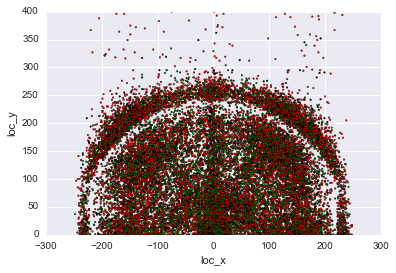

In [27]:
shots_pos.plot.scatter(x='loc_x', y='loc_y', s=3, c=shot_colors, ylim=(0,400))

# Notes

* Can we improve the missing data strategy?
* Are all the limitations to algorithm application verified?

* prevent leakage: train only on shots prior to the ones we're predicting (year)
* select features and then explore number of neighbours

* target: score=0.75

# Preprocessing

In [57]:
# TRAINING AND TEST DATA
train_data, test_data = train_test_split(data, test_size = 0.2, random_state = 0)

In [58]:
# MISSING DATA
# don't consider rows with shot_made_flag = NaN
train_data = train_data[np.isfinite(train_data['shot_made_flag'])]
test_data = test_data[np.isfinite(test_data['shot_made_flag'])]

# Engineering features

In [59]:
total_shots = pd.pivot_table(data, index="opponent", values="shot_id", aggfunc='count')

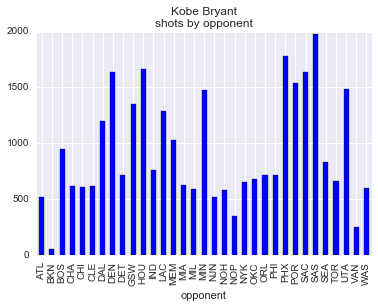

In [60]:
total_shots.plot.bar(title='Kobe Bryant\nshots by opponent')

In [61]:
total_distance = pd.pivot_table(data, index="shot_distance", values="shot_id", aggfunc='count')

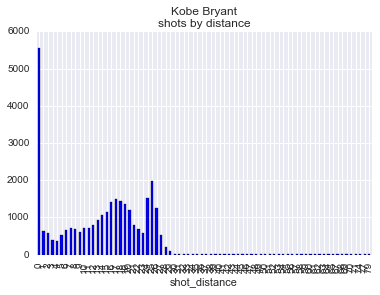

In [62]:
total_distance.plot.bar(title='Kobe Bryant\nshots by distance')

In [63]:
# fazia sentido definir clusters para agrupar distâncias em zonas de lançamento?

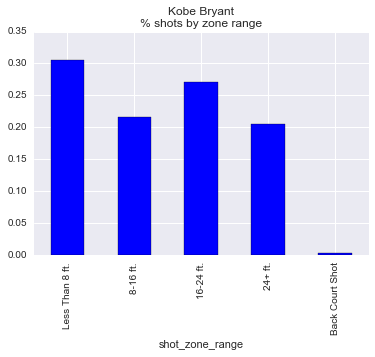

In [64]:
shot_zones = pd.pivot_table(data, index="shot_zone_range", values="shot_id", aggfunc='count')
shot_zones_pct = shot_zones/shot_zones.sum()

# change order
shot_zones_pct = shot_zones_pct.reindex(index=['Less Than 8 ft.',  u'8-16 ft.', u'16-24 ft.', u'24+ ft.', u'Back Court Shot'])
shot_zones_pct.plot.bar(title='Kobe Bryant\n% shots by zone range')

# 1. kNN

** References: **
* http://scikit-learn.org/stable/modules/neighbors.html
* http://www.amazon.com/Building-Machine-Learning-Systems-Python/dp/1784392774/ref=sr_1_1?ie=UTF8&qid=1461733493&sr=8-1&keywords=luis+pedro+coelho+python

In [65]:
from sklearn import neighbors

In [66]:
knn = neighbors.KNeighborsClassifier(n_neighbors=20)

In [67]:
#x1 = train_data['loc_x'].reshape(len(train_data['loc_x']),1)
#x2 = train_data['loc_y'].reshape(len(train_data['loc_y']),1)
x = train_data['shot_distance'].reshape(len(train_data['shot_distance']),1)

In [68]:
#x = np.concatenate((x1,x2), axis=1)
y = train_data['shot_made_flag'].reshape(len(train_data['shot_made_flag']),1)

print x.shape
print y.shape

(20550, 1)
(20550, 1)


In [69]:
knn.fit(x,y.ravel())

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=20, p=2,
           weights='uniform')

In [70]:
print y

[[ 1.]
 [ 1.]
 [ 1.]
 ..., 
 [ 1.]
 [ 0.]
 [ 1.]]


In [71]:
print y.ravel()

[ 1.  1.  1. ...,  1.  0.  1.]


In [72]:
knn.predict([0])

/Users/joaopcoelho/anaconda/envs/python2/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([ 1.])

In [73]:
knn.predict_proba([0])

/Users/joaopcoelho/anaconda/envs/python2/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([[ 0.15,  0.85]])

## 1.1 kNN evaluation

In [74]:
#x1_test = test_data['loc_x'].reshape(len(test_data['loc_x']),1)
#x2_test = test_data['loc_y'].reshape(len(test_data['loc_y']),1)
x_test = test_data['shot_distance'].reshape(len(test_data['shot_distance']),1)

In [75]:
#x_test = np.concatenate((x1_test,x2_test), axis=1)
y_test = test_data['shot_made_flag'].reshape(len(test_data['shot_made_flag']),1)

In [76]:
knn.score(x_test,y_test)

0.5785894695939382

In [81]:
l = []
for i in xrange(1,100):
    knn = neighbors.KNeighborsClassifier(n_neighbors=i)
    knn.fit(x,y.ravel())
    
    sc = knn.score(x_test,y_test)
    l.append(sc)

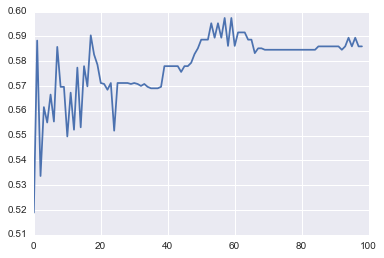

In [83]:
plt.plot(l)